# Урок 8. Корреляционный анализ

In [1]:
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt

***
## Задание 1.

### Проведено 4 эксперимента. Для каждого построить график и посчитать коэффициенты корреляции Пирсона.

In [2]:
X = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
Y = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])

In [3]:
cov = np.mean(X*Y) - np.mean(X)*np.mean(Y)
SDx = np.std(X)
SDy = np.std(Y)
r = cov / (SDx * SDy)
r

0.8164205163448375

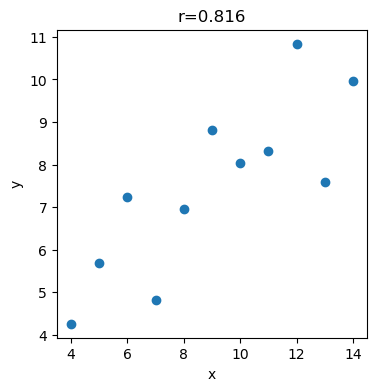

In [4]:
plt.figure(figsize=(4,4))
plt.scatter(X, Y)
plt.title(f'r={r:.3f}')
plt.xlabel('x')
plt.ylabel('y');

In [5]:
X = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
Y = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])

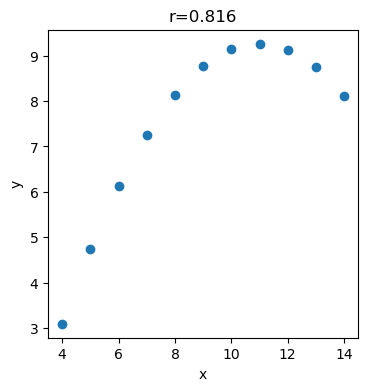

In [6]:
r = np.corrcoef(X,Y)[1,0]

plt.figure(figsize=(4,4))
plt.scatter(X, Y)
plt.title(f'r={r:.3f}')
plt.xlabel('x')
plt.ylabel('y');

In [7]:
X = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
Y = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])

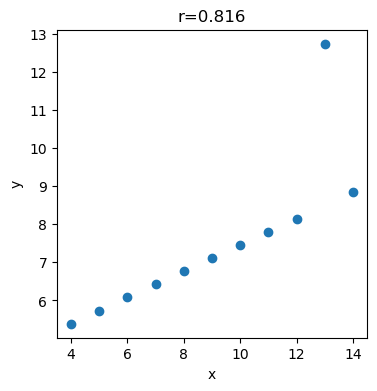

In [8]:
r = np.corrcoef(X,Y)[1,0]

plt.figure(figsize=(4,4))
plt.scatter(X, Y)
plt.title(f'r={r:.3f}')
plt.xlabel('x')
plt.ylabel('y');

In [9]:
X = np.array([8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8])
Y = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89])

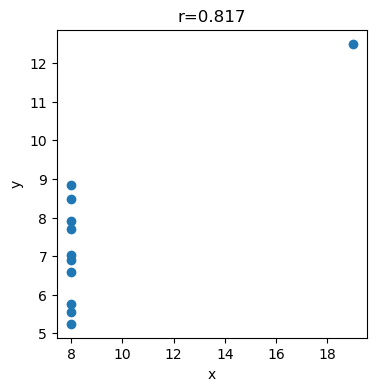

In [10]:
r = np.corrcoef(X,Y)[1,0]

plt.figure(figsize=(4,4))
plt.scatter(X, Y)
plt.title(f'r={r:.3f}')
plt.xlabel('x')
plt.ylabel('y');

In [11]:
X = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7,5, 15, 16, 18 ])
Y = np.array([9.14, 8.14, 8.74,8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74, 6.5, 5, 2.9])

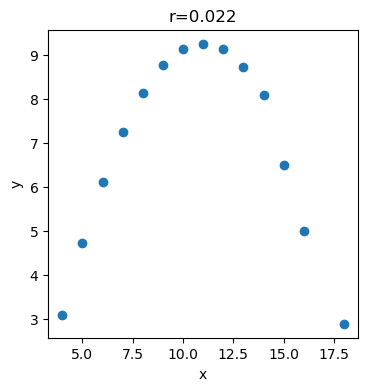

In [12]:
r = np.corrcoef(X,Y)[1,0]

plt.figure(figsize=(4,4))
plt.scatter(X, Y)
plt.title(f'r={r:.3f}')
plt.xlabel('x')
plt.ylabel('y');

***
## Задание 2.

### 2.1 Провести двусторонний тест и ответить на вопрос, есть ли статистически значимые различия между средними 2х нормально распределенных генеральных совокупностей,представленных следующими независимыми выборками. Уровень статистической значимости принять за 5%. <br> 1. Используйте функцию в Python. <br> 2. Имея p-value из функции рассчитать наблюдаемое значение критерия.

$H_0: M(X) = M(Y)$ \
$H_1: M(X) \not= M(Y)$

In [13]:
X = np.array([12, 10, 11, 19, 13, 11, 17, 15, 19, 14, 21, 18, 21, 11, 17, 14, 15, 17, 20, 19])
Y = np.array([11, 13, 18, 15, 17, 18, 10, 21, 26, 15, 11, 12, 15, 17, 10, 18, 18, 12, 21, 20])

In [14]:
alpha = 0.05
n, m = X.shape[0], Y.shape[0]
Mx, My = np.mean(X), np.mean(Y)
Dx, Dy = np.var(X, ddof=1), np.var(Y, ddof=1)

se = np.sqrt(Dx/n + Dy/m)
Tn = (Mx - My) / se
print(f'{Tn = }')

k = n + m - 2
Tk = stats.t.ppf(1-alpha/2, k)
print(f'{Tk = }')

print(f'H0: M(X) = M(Y) is {abs(Tn)<Tk}')

Tn = -0.1599663264228627
Tk = 2.024394164575136
H0: M(X) = M(Y) is True


In [15]:
p_value = (1-stats.t.cdf(abs(Tn), k))*2
print(f'{p_value = }')
print(f'H0: M(X)=M(Y) is {p_value>alpha}')

p_value = 0.8737549039369696
H0: M(X)=M(Y) is True


In [16]:
stats.ttest_ind(X, Y)

Ttest_indResult(statistic=-0.1599663264228627, pvalue=0.8737549039369696)

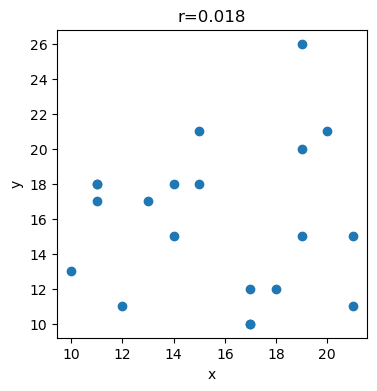

In [17]:
r = np.corrcoef(X,Y)[1,0]

plt.figure(figsize=(4,4))
plt.scatter(X, Y)
plt.title(f'r={r:.3f}')
plt.xlabel('x')
plt.ylabel('y');

### 2.2 Используя функцию stats.ttest_ind, проведите односторонний тест. Проверить ,что $M(X) > M(Y)$.

In [18]:
stats.ttest_ind(X, Y, alternative='greater')

Ttest_indResult(statistic=-0.1599663264228627, pvalue=0.5631225480315152)

### 2.3 Используя функцию stats.ttest_ind, проведите односторонний тест. Проверить ,что $M(X) < M(Y)$.

In [19]:
stats.ttest_ind(X, Y, alternative='less')

Ttest_indResult(statistic=-0.1599663264228627, pvalue=0.4368774519684848)